In [2]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

In [3]:
data_one_hot = pd.read_csv('../data/data_one_hot.csv')

In [4]:
data_one_hot.tail()

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0
568,568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0.0


In [5]:
y = data_one_hot["diagnosis_M"]
X = data_one_hot[["concave points_worst","radius_worst","texture_worst","perimeter_se"]] 

In [7]:
data = data_one_hot[["concave points_worst","radius_worst","texture_worst","perimeter_se", "diagnosis_M"]]

In [8]:
data.tail(15)

,concave points_worst,radius_worst,texture_worst,perimeter_se,diagnosis_M
554,0.06493,13.890,35.74,1.502,0.0
555,0.09127,10.840,34.91,1.437,0.0
556,0.02232,10.650,22.88,1.648,0.0
557,0.00000,10.490,34.24,3.618,0.0
558,0.11050,15.480,27.27,2.224,0.0
559,0.09653,12.480,37.16,1.936,0.0
560,0.10480,15.300,33.17,2.888,0.0
561,0.00000,11.920,38.30,2.041,0.0
562,0.23560,17.520,42.79,2.362,1.0
563,0.25420,24.290,29.41,8.758,1.0


In [6]:
#make_pipeline(RobustScaler(), LogisticRegression())
clf_pipeline = Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logicticRegression', LogisticRegression())])


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y) 

In [8]:
clf_pipeline_train = clf_pipeline.fit(X_train, y_train)

In [9]:
# Cross val pipeline
cross_val_score(clf_pipeline, X_train, y_train, cv=41, scoring='recall').mean()

0.9410569105691058

In [68]:
clf_pipeline_train.get_params()

{'memory': None,
 'steps': [('robustscaler', RobustScaler()),
  ('logicticRegression', LogisticRegression())],
 'verbose': False,
 'robustscaler': RobustScaler(),
 'logicticRegression': LogisticRegression(),
 'robustscaler__copy': True,
 'robustscaler__quantile_range': (25.0, 75.0),
 'robustscaler__unit_variance': False,
 'robustscaler__with_centering': True,
 'robustscaler__with_scaling': True,
 'logicticRegression__C': 1.0,
 'logicticRegression__class_weight': None,
 'logicticRegression__dual': False,
 'logicticRegression__fit_intercept': True,
 'logicticRegression__intercept_scaling': 1,
 'logicticRegression__l1_ratio': None,
 'logicticRegression__max_iter': 100,
 'logicticRegression__multi_class': 'auto',
 'logicticRegression__n_jobs': None,
 'logicticRegression__penalty': 'l2',
 'logicticRegression__random_state': None,
 'logicticRegression__solver': 'lbfgs',
 'logicticRegression__tol': 0.0001,
 'logicticRegression__verbose': 0,
 'logicticRegression__warm_start': False}

In [ ]:
# Export as pickle file
with open("pipeline_01.pkl", "wb") as file:
    pickle.dump(clf_pipeline_train, file)

# Load pipeline from pickle file
clf_pipeline_train = pickle.load(open("pipeline_01.pkl","rb"))

clf_pipeline_train.score(X_test, y_test)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#make_pipeline(RobustScaler(), LogisticRegression())
clf_pipeline = Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lr', LogisticRegression())])

param_grid = {
    'lr__solver': ['newton-cg', 'lbfgs'],
    'lr__penalty': ['none', 'elasticnet', 'l1', 'l2'],
    'lr__max_iter': [30, 100, 300, 500],
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

grid_search.best_params_

/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will

/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will

/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will

/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will

/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will

/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/laura/.pyenv/versions/3.8.12/envs/simplon/l

{'lr__C': 10,
 'lr__max_iter': 30,
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cg'}

510    0.0
520    0.0
311    0.0
25     1.0
530    0.0
      ... 
32     1.0
377    0.0
535    1.0
236    1.0
354    0.0
Name: diagnosis_M, Length: 171, dtype: float64

In [70]:
# Export as pickle file
with open("pipeline_vf.pkl", "wb") as file:
    pickle.dump(grid_search, file)

# Load pipeline from pickle file
grid_search = pickle.load(open("pipeline_vf.pkl","rb"))

grid_search.score(X_test, y_test)

0.9375

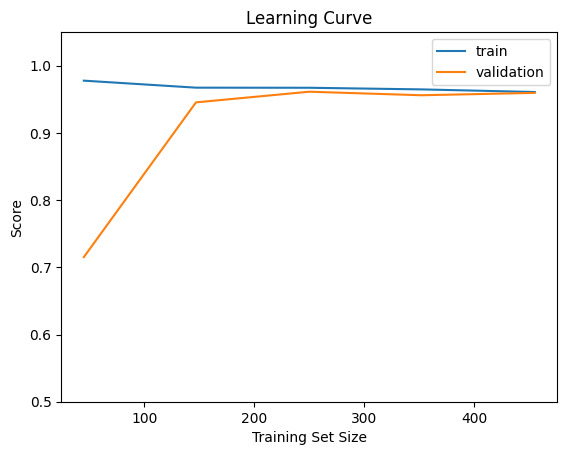

In [16]:
    #Learning Curve   
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(clf_pipeline_train, X, y,return_times=True)
    plt.plot(train_sizes,np.mean(train_scores,axis=1), label='train')
    plt.plot(train_sizes,np.mean(test_scores,axis=1), label='validation')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.ylim([0.5,1.05])
    plt.show()